In [2]:
#Import libraries

import numpy as np
import pandas as pd
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
df=pd.read_csv('/content/Real_time_dataset.csv')
feat=df['Height']
lab=df['Weight']
feat.shape,lab.shape

((25,), (25,))

In [4]:
df.head()

,Sample,Height,Weight,Age,Gender
0,1,5.7,68,22,Male
1,2,5.6,67,29,Male
2,3,5.6,52,23,Female
3,4,5.9,80,26,Male
4,5,5.5,70,30,Male


In [6]:
df.describe()

,Sample,Height,Weight,Age
count,25.000000,25.000000,25.000000,25.000000
mean,13.000000,5.596400,69.440000,26.320000
std,7.359801,0.334152,10.657861,3.387723
min,1.000000,5.000000,52.000000,22.000000
25%,7.000000,5.400000,61.000000,24.000000
50%,13.000000,5.600000,70.000000,26.000000
75%,19.000000,5.900000,79.000000,29.000000
max,25.000000,6.100000,88.000000,36.000000


In [7]:
df.Weight = df.Weight.astype(float)

In [8]:
# Convert Gender column data type as String for easy Processing in next step.
df.Gender.astype(str)

0       Male
1       Male
2     Female
3       Male
4       Male
5     female
6       Male
7       male
8     female
9       Male
10      male
11    female
12      male
13      male
14      Male
15    Female
16      Male
17      Male
18      Male
19    female
20    Female
21      Male
22    Female
23    Female
24      Male
Name: Gender, dtype: object

In [9]:
# Make all wordds in gender column of same case, let it be Upper Case
df['Gender'] = df['Gender'].apply(lambda x: x.upper())

To categoriesed Gender Column have two classes. So need to do Label Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['Gender'] = LE.fit_transform(df['Gender'])

In [13]:
df

,Sample,Height,Weight,Age,Gender
0,1,5.70,68.0,22,1
1,2,5.60,67.0,29,1
2,3,5.60,52.0,23,0
3,4,5.90,80.0,26,1
4,5,5.50,70.0,30,1
5,6,5.00,54.0,29,0
6,7,5.50,70.0,22,1
7,8,5.10,82.0,25,1
8,9,5.20,54.0,25,0
9,10,6.00,73.0,22,1


In [14]:
# Now need to convert all data items to float type
df.gender = df.Gender.astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [15]:
X = df[['Height','Weight']]
y = df['Gender']

X = np.c_[np.ones((X.shape[0], 1)), X]
y = y[:, np.newaxis] # make y 2 d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


# **LOSS FUNCTION-1**

In [18]:
from sklearn.model_selection import train_test_split
X = df[['Height','Weight']]
y = df['Gender']
y = pd.to_numeric(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [19]:
# Creating the logistic regression model
# Helper function to normalize data
def normalize(X):
    return X - X.mean()

# Method to make predictions
def predict(X, b0, b1,b2):
    x1 = X['Height'].astype(float)
    x2 = X['Weight'].astype(float)
    return np.array(1 / (1 + np.exp(-1*b0 + -1*b1*x1 + -1*b2*x2)) )

# Method to train the model
def logistic_regression(X, Y):
    x1 = X['Height']
    x2 = X['Weight']
    x1 = normalize(x1)
    x2 = normalize(x2) 
    # Initializing variables
    b0 = 0
    b1 = 0
    b2 = 0
    L = 0.001
    epochs = 400
    for epoch in range(epochs):
        y_pred = predict(X, b0, b1,b2)
        D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b0
        D_b1 = -2 * sum(x1 * (Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b1
        D_b2 = -2 * sum(x2* (Y - y_pred) * y_pred * (1 - y_pred))
        # Update b0 and b1
        b0 = b0 - L * D_b0
        b1 = b1 - L * D_b1
        b2 = b2 - L*D_b2
    return b0, b1, b2

In [21]:
from math import exp
b0, b1, b2 = logistic_regression(X_train, y_train)

# Making predictions
X_test_norm = normalize(X_test)
y_pred = predict(X_test_norm, b0, b1,b2)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

# The accuracy
accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        accuracy += 1
print(f"Accuracy = {accuracy / len(y_pred)}")

Accuracy = 0.8


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [23]:
def linear_regression():
	x = tf.placeholder(tf.float32, shape=(None, ), name='x')
	y = tf.placeholder(tf.float32, shape=(None, ), name='y')

	with tf.variable_scope('lreg') as scope:
		w = tf.Variable(np.random.normal(), name='W')
		b = tf.Variable(np.random.normal(), name='b')
		
    # element-wise multiplication and then addition
		y_pred = tf.add(tf.multiply(w, x), b)
  
    # calculate mean square error (MSE)
		loss = tf.reduce_mean(tf.square(y_pred - y))

	return x, y, y_pred, loss

0 loss: 3650.1526
1 loss: 3271.4941
2 loss: 2933.0466
3 loss: 2630.5403
4 loss: 2360.1565
5 loss: 2118.4854
6 loss: 1902.4772
7 loss: 1709.4075
8 loss: 1536.8397
9 loss: 1382.5975
Predicting


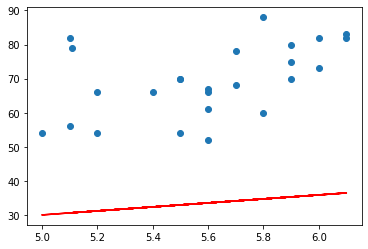

In [24]:
def run():
	x_batch, y_batch = feat,lab

	x, y, y_pred, loss = linear_regression()

	optimizer = tf.train.GradientDescentOptimizer(0.03)
	train_op = optimizer.minimize(loss)

	with tf.Session() as session:
		session.run(tf.global_variables_initializer())

		feed_dict = {x: x_batch, y: y_batch}
		
		for i in range(10):
			_ = session.run(train_op, feed_dict)
			print(i, "loss:", loss.eval(feed_dict))

		print('Predicting')
		y_pred_batch = session.run(y_pred, {x : x_batch})

	plt.scatter(x_batch, y_batch)
	plt.plot(x_batch, y_pred_batch, color='red')
	#plt.xlim(0, 2)
	#plt.ylim(0, 2)
	plt.savefig('plot.png')

if __name__ == "__main__":
	run()